In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("/kaggle/input/climate-data-for-the-max-temperatures/data.xlsx")
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,Mbarara,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,29.300,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,29.267,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,29.100,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,26.800,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,26.367,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767


In [3]:
data['date'] = data['YEAR'].astype("str") + '-' + data['MONTH'].astype("str")
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,...,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai,date
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,...,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233,2012-1
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,...,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800,2012-2
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,...,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400,2012-3
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,...,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167,2012-4
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,...,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767,2012-5


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,...,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai,date
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,...,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233,2012-01-01
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,...,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800,2012-02-01
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,...,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400,2012-03-01
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,...,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167,2012-04-01
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,...,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767,2012-05-01


In [5]:
new_df = data.set_index('date')
new_df

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,Mbarara,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai
date,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,29.300,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233
2012-02-01,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,29.267,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800
2012-03-01,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,29.100,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400
2012-04-01,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,26.800,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167
2012-05-01,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,26.367,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,2018,2,34.800,33.300,34.500,31.933,33.367,34.567,34.567,31.267,29.433,27.100,25.433,30.767,33.500,30.100,29.867,32.133,29.867,35.967
2018-03-01,2018,3,30.300,29.567,29.767,28.500,29.000,29.300,29.300,26.900,26.967,24.667,24.133,27.333,29.300,25.267,26.967,27.167,25.233,32.100
2018-04-01,2018,4,28.700,28.933,28.900,27.433,28.100,28.433,28.433,26.267,26.433,24.600,23.467,26.600,27.567,25.167,26.867,26.167,25.033,30.000


In [6]:
time_series_kampala = new_df[['Kampala']].astype('float32')
time_series_kampala

,Kampala
date,
2012-01-01,30.333000
2012-02-01,30.132999
2012-03-01,28.833000
2012-04-01,27.299999
2012-05-01,27.200001
...,...
2018-02-01,30.767000
2018-03-01,27.333000
2018-04-01,26.600000


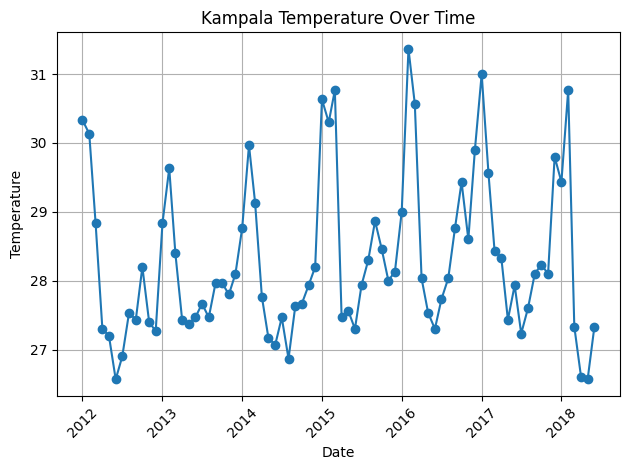

In [7]:
plt.plot(time_series_kampala , marker='o' )

plt.title('Kampala Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

# Displaying the dates on the x-axis
plt.xticks(rotation=45)
plt.tight_layout()

In [8]:
Xtrain = time_series_kampala[:60]

Xtest = time_series_kampala[60:]

In [9]:
def create_dataset(data : pd.DataFrame, lookback):
    df = data.copy()
    
    for i in range(lookback):
        df[f'temp_shift_{i}'] = df['Kampala'].shift(i)
    
    df.dropna(inplace=True)
    
    return df

In [10]:
lookback = 4
Xtrain_df = create_dataset(Xtrain, lookback)
Xtest_df = create_dataset(Xtest, lookback)

In [11]:
Xtrain_df

,Kampala,temp_shift_0,temp_shift_1,temp_shift_2,temp_shift_3
date,,,,,
2012-04-01,27.299999,27.299999,28.833000,30.132999,30.333000
2012-05-01,27.200001,27.200001,27.299999,28.833000,30.132999
2012-06-01,26.566999,26.566999,27.200001,27.299999,28.833000
2012-07-01,26.900000,26.900000,26.566999,27.200001,27.299999
2012-08-01,27.533001,27.533001,26.900000,26.566999,27.200001
2012-09-01,27.433001,27.433001,27.533001,26.900000,26.566999
2012-10-01,28.200001,28.200001,27.433001,27.533001,26.900000
2012-11-01,27.400000,27.400000,28.200001,27.433001,27.533001
2012-12-01,27.267000,27.267000,27.400000,28.200001,27.433001


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Xtrain_df.to_numpy())

Xtrain_scaled = scaler.transform(Xtrain_df.to_numpy())
Xtest_scaled = scaler.transform(Xtest_df.to_numpy())

In [13]:
Xtrain = Xtrain_scaled[:, 1:]
ytrain = Xtrain_scaled[:, 0]

Xtest = Xtest_scaled[:, 1:]
ytest = Xtest_scaled[:, 0]

In [14]:
Xtrain = Xtrain.reshape((-1, lookback, 1))
Xtest = Xtest.reshape((-1, lookback, 1))

ytrain = ytrain.reshape((-1, 1))
ytest = ytest.reshape((-1, 1))

In [15]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((57, 4, 1), (15, 4, 1), (57, 1), (15, 1))

In [16]:
from torch.utils.data import Dataset

class RNNDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
Train_dataset = RNNDataset(torch.from_numpy(Xtrain), torch.from_numpy(ytrain))
Test_dataset = RNNDataset(torch.from_numpy(Xtest), torch.from_numpy(ytest))

In [17]:
Train_dataset[0][0].size(0)

4

In [18]:
from torch.utils.data import DataLoader

batch = 5
Train_dataloader = DataLoader(Train_dataset, batch, shuffle = True)
Test_dataloader = DataLoader(Test_dataset, batch)

In [19]:
for _, batch in enumerate(Train_dataloader):
    train_batch, y_batch = batch[0], batch[1]
    print(train_batch.shape)
    print(y_batch.shape)
    break

torch.Size([5, 4, 1])
torch.Size([5, 1])


In [20]:
from torch import nn

In [21]:
class ModelLSTM(nn.Module):
    def __init__(self, num_ouput = 1, hidden_size = 128, num_layers = 1):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=1, hidden_size=self.hidden_size, num_layers=num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        
        x, _ = self.lstm(x, (h0, c0))
        x = self.linear(x)
        return x[:, -1, :]

lstm_model = ModelLSTM()
lstm_model

ModelLSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)

In [22]:
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam

In [23]:
loss_fn = nn.MSELoss()
optimizer = Adam(lstm_model.parameters())
epochs = 30

In [24]:
train_losses = []
test_losses = []

for epoch in range(epochs):
    lstm_model.train()
    train_loss = 0
    test_loss = 0
    
    for index, batch in enumerate(Train_dataloader):
        X_batch, y_batch = batch[0], batch[1]
        y_pred = lstm_model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    lstm_model.eval()
    with torch.inference_mode():
        for index, batch in enumerate(Test_dataloader):
            X_batch, y_batch = batch[0], batch[1]
            y_pred_test = lstm_model(X_batch)
            loss = loss_fn(y_pred_test, y_batch)
            test_loss += loss.item()
        
        train_rmse = np.sqrt(train_loss)
        test_rmse = np.sqrt(test_loss)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
    print("Epoch %d: train MSE %.4f, test MSE %.4f, train RMSE %.4f, test RMSE %.4f" % (epoch, train_loss, test_loss, train_rmse, test_rmse))

Epoch 0: train MSE 12.4409, test MSE 3.0390, train RMSE 3.5272, test RMSE 1.7433
Epoch 1: train MSE 10.8736, test MSE 2.5088, train RMSE 3.2975, test RMSE 1.5839
Epoch 2: train MSE 5.5374, test MSE 1.3539, train RMSE 2.3532, test RMSE 1.1636
Epoch 3: train MSE 6.2347, test MSE 3.0196, train RMSE 2.4969, test RMSE 1.7377
Epoch 4: train MSE 11.8303, test MSE 1.2581, train RMSE 3.4395, test RMSE 1.1217
Epoch 5: train MSE 4.6385, test MSE 2.1100, train RMSE 2.1537, test RMSE 1.4526
Epoch 6: train MSE 10.6499, test MSE 3.6269, train RMSE 3.2634, test RMSE 1.9044
Epoch 7: train MSE 12.6919, test MSE 3.2900, train RMSE 3.5626, test RMSE 1.8138
Epoch 8: train MSE 11.0890, test MSE 3.1285, train RMSE 3.3300, test RMSE 1.7688
Epoch 9: train MSE 10.9203, test MSE 3.1993, train RMSE 3.3046, test RMSE 1.7887
Epoch 10: train MSE 12.5499, test MSE 3.2390, train RMSE 3.5426, test RMSE 1.7997
Epoch 11: train MSE 10.9629, test MSE 3.1290, train RMSE 3.3110, test RMSE 1.7689
Epoch 12: train MSE 10.9727, 

In [25]:
lstm_model.eval()

ModelLSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)

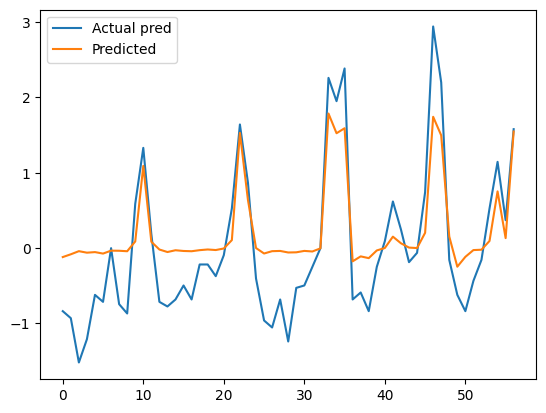

In [26]:
with torch.inference_mode():
    predictions = lstm_model(torch.from_numpy(Xtrain)).numpy()
    
plt.plot(ytrain, label='Actual pred')
plt.plot(predictions, label = "Predicted")
plt.legend()

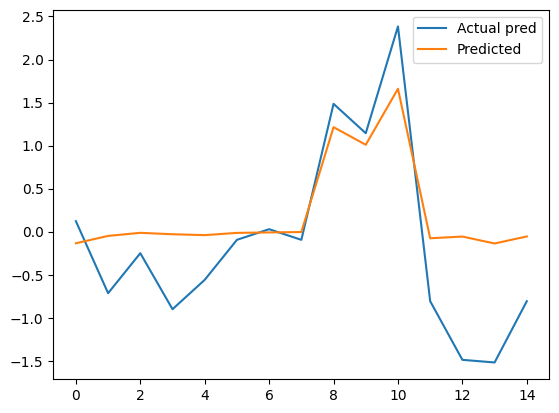

In [27]:
with torch.inference_mode():
    predictions = lstm_model(torch.from_numpy(Xtest)).numpy()
    
plt.plot(ytest, label='Actual pred')
plt.plot(predictions, label = "Predicted")
plt.legend()